BB and WW are measures of positive spatial autocorrelation
BW measures negative spatial autocorrelation

In [195]:
%matplotlib inline

In [196]:
import matplotlib.pylab as plt

In [197]:
import pysal
import numpy as np
np.random.seed(12345)

In [208]:
nx = 10
w=pysal.lat2W(nx,nx)
y=np.ones(nx**2)
y[0:nx**2/2]=0

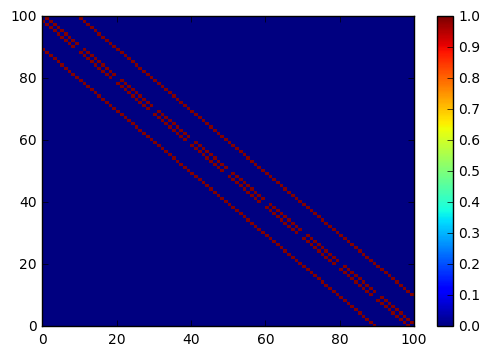

In [209]:
plt.pcolormesh(np.flipud(w.full()[0]))
plt.colorbar()

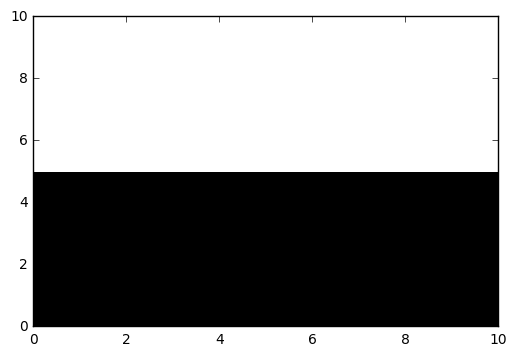

In [210]:
y = y.reshape(nx,nx)
plt.pcolormesh(y, cmap = 'cubehelix')

In [211]:
jc=pysal.Join_Counts(y,w)
print jc.bb
print jc.bw
print jc.ww


85.0
10.0
85.0


In [212]:
njoins = 2*(nx-1)*nx

In [213]:
import scipy as sp

def build_checkerboard(w, h) :
    re = np.r_[ w*[0,1] ]              # even-numbered rows
    ro = np.r_[ w*[1,0] ]              # odd-numbered rows
    return np.row_stack(h*(re, ro))


checker = build_checkerboard(nx/2, nx/2)

0.0
180.0
0.0


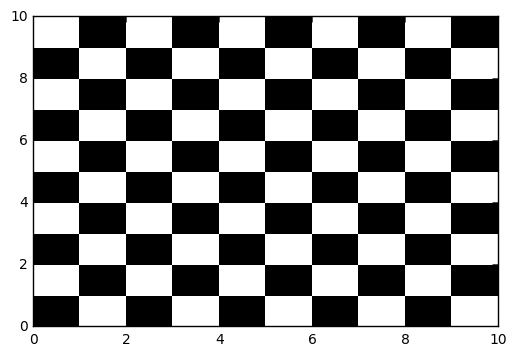

In [214]:
plt.pcolormesh(checker, cmap = 'cubehelix')
jc=pysal.Join_Counts(checker,w)
print jc.bb
print jc.bw
print jc.ww

45.0   0.854
99.0   0.118
36.0   0.899


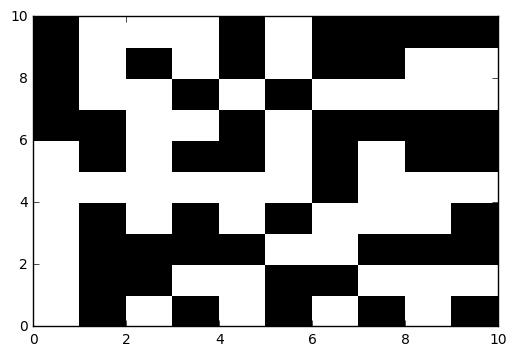

In [215]:
gnoise = sp.randn(nx, nx) > 0
plt.pcolormesh(gnoise, cmap = 'cubehelix')


jc=pysal.Join_Counts(gnoise,w)
print jc.bb, ' ', jc.p_sim_bb
print jc.bw, ' ', jc.p_sim_bw
print jc.ww, ' ', (sum(njoins - jc.sim_bb - jc.sim_bw  > jc.ww) + 1)/(jc.permutations + 1.)